In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_file_path = "C:\\ESTERA\\CCT\\TWEETS\\ProjectTweets.csv"
column_names =['Id','Tweet_id','Date','No_Querry','User','Tweet']

data_2 = pd.read_csv(csv_file_path, names=column_names)
data_2.columns = column_names

In [3]:
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Id         1600000 non-null  int64 
 1   Tweet_id   1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   No_Querry  1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
# removing the 'PDT' part from the 'Date' column
data_2['Date'] = data_2['Date'].str.replace(' PDT', '')

# converting the 'Date' column to a datetime format
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%a %b %d %H:%M:%S %Y')

# extracting the 'Time' component while preserving the original date format
data_2['Time'] = data_2['Date'].dt.strftime('%H:%M:%S')

# extracting the 'Date' component in the 'YYYY-MM-DD' format
data_2['Date'] = data_2['Date'].dt.strftime('%Y-%m-%d')

In [6]:
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",22:19:45
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,22:19:49
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,22:19:53
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,22:19:57
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",22:19:57


### preprocessing data before pulling context

In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ester\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# appling the preprocessing function to the 'Tweet' column
data_2['Tweet'] = data_2['Tweet'].apply(preprocess_text)
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,switchfoot http awww bummer shoulda got david ...,22:19:45
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset ca update facebook texting might cry res...,22:19:49
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,22:19:53
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire,22:19:57
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,nationwideclass behaving mad ca see,22:19:57


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# creating a Document-Term Matrix (DTM)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(data_2['Tweet'])

# appling LDA
num_topics = 5 
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
# getting the top 10 words for each topic
num_top_words = 10  
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: love, lol, thanks, fun, good, night, come, lt, yes, way
Topic 2: going, know, home, today, right, time, oh, sick, want, let
Topic 3: http, na, miss, twitter, sorry, sad, gon, really, people, wan
Topic 4: day, work, good, morning, tomorrow, ca, today, sleep, happy, school
Topic 5: like, quot, got, yeah, feel, new, soon, better, make, cool


###
Topic 1: Positive Emotions <br>
Topic 2: Daily Life and Activities<br>
Topic 3: Online Interaction and Communication <br>
Topic 4: Daily Routine and Well-being <br>
Topic 5: Expressing Thoughts and Opinions

In [11]:
# assigning topics to documents
topic_distribution = lda.transform(dtm)

# adding 1 to topic labels to make them start from 1
data_2['Topic'] = (topic_distribution.argmax(axis=1) + 1)

In [12]:
data_2.head(10)

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time,Topic
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,switchfoot http awww bummer shoulda got david ...,22:19:45,3
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset ca update facebook texting might cry res...,22:19:49,4
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,22:19:53,5
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire,22:19:57,5
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,nationwideclass behaving mad ca see,22:19:57,4
5,5,1467811372,2009-04-06,NO_QUERY,joy_wolf,kwesidei whole crew,22:20:00,1
6,6,1467811592,2009-04-06,NO_QUERY,mybirch,need hug,22:20:03,4
7,7,1467811594,2009-04-06,NO_QUERY,coZZ,loltrish hey long time see yes rains bit bit l...,22:20:03,1
8,8,1467811795,2009-04-06,NO_QUERY,2Hood4Hollywood,nope,22:20:05,5
9,9,1467812025,2009-04-06,NO_QUERY,mimismo,twittera que muera,22:20:09,1


<Figure size 1200x600 with 0 Axes>

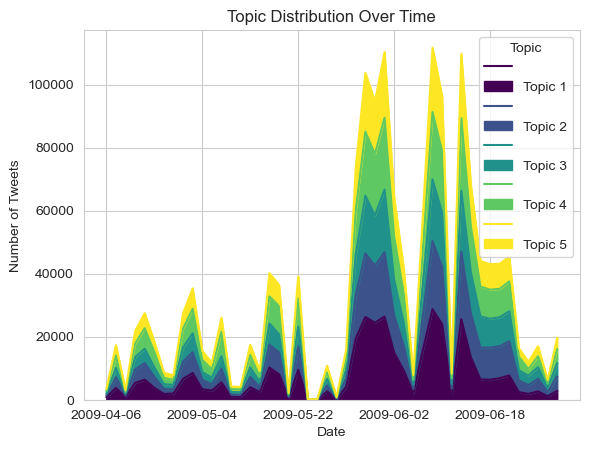

In [13]:
# groupping by 'Date' and 'Topic', and count the number of occurrences
topic_counts = data_2.groupby(['Date', 'Topic']).size().unstack(fill_value=0)

# creating a stacked area plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
topic_counts.plot(kind='area', stacked=True, colormap='viridis')
plt.title("Topic Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title='Topic', loc='upper right', labels=['', 'Topic 1', '', 'Topic 2', '', 'Topic 3','','Topic 4','','Topic 5'])
plt.show()